In [38]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt
from numpy.random import randint

In [39]:
Star1 =  randint(1, 50,31)
Star2 =  randint(1, 50, 31)
table = pd.DataFrame({'Сонце':Star1, 'Альфа Центавра':Star2}, index=np.arange(1, len(Star1) + 1))
table.index.name = 'Дата'
table.columns.name = 'Кількість спалахив за травень'
table

Кількість спалахив за травень,Сонце,Альфа Центавра
Дата,,
1,43,38
2,18,15
3,32,31
4,47,24
5,24,26
6,11,13
7,46,16
8,45,27
9,45,2


Побудуємо графік, що відображає розкид даних в групах

[]

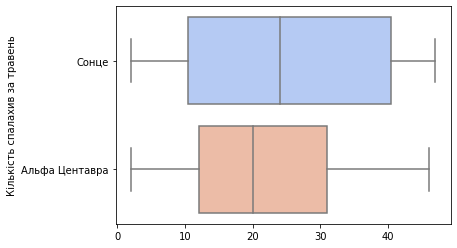

In [40]:
sns.boxplot(data=table, orient='h',palette='coolwarm').set()

Написати функцію для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant)

In [41]:
def duspersia(arr):
    return np.var(arr)

def Liven(group1, group2):
    d1 = duspersia(group1)
    d2 = duspersia(group2)
    if(d1 >= d2):
        F=d1/d2
    else:
        F=d2/d1 
    print("Отримане значення критерію Лівеня: F = ", F)
    
    df1=len(group1)-1
    df2=len(group2)-1

    import xlrd, xlwt
    rb = xlrd.open_workbook('D:\BMD\laba7\Таблиця критичних значень для критерію Лівеня.xlsx')
    sheet = rb.sheet_by_index(0)
    if(df1<=10 and df2<=20):
        F_tabl = sheet.row_values(df2 + 1)[df1]
    
    if(df1==15 and df2<=20):
        F_tabl = sheet.row_values(df2 + 1)[11]
    if(df1>15 and df2>20):
        F_tabl = sheet.row_values(22)[12]    
    
    print("Критичне значення критерію: F_кр = ", F_tabl)
    if (F_tabl < F):
        result = "significant" 
    else:
        result = "not significant"  
    print("Результат оцінки значимості зв'зку: ",result)
    return result

In [42]:
Liven(Star1,Star2)

Отримане значення критерію Лівеня: F =  1.58288950623916
Критичне значення критерію: F_кр =  1.45
Результат оцінки значимості зв'зку:  significant


'significant'

Написати функцію для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію та значення ступеня свободи та результат оцінки значимості звязку (significant або not significant)

In [47]:
def Sum_count(arr):
    sum=0
    for i in range(len(arr)):
        sum += arr[i]
    return sum/len(arr)    

def Standatne_vid(arr):
    return np.std(arr)

def Student(result,group1 , group2):
    r1 = "not significant"
    
    sum1 = Sum_count(group1)
    sum2 = Sum_count(group2)
    
    L1 = len(group1)
    L2 = len(group2)
    
    q1 = Standatne_vid(group1)
    q2 = Standatne_vid(group2)

    rq1 = q1**2
    rq2 = q2**2
    
    
    if(r1 == result):
        t = (abs(sum1 - sum2))/(math.sqrt((rq1/L1)+((rq2)/L2)))
    else:
        t = (abs(sum1 - sum2))/(math.sqrt(((((L1-1)*rq1) + ((L2-1)*rq2))*((1/L1)+(1/L2)))/(L1 + L2 - 2)))
    print("--------------------------------------------------------")     
    print("Отримане значення критерію Стьюдента: t = ", t)
    
    df = L1 + L2 - 2
    print("Ступінь свободи: df = ", df)
    
    import xlrd, xlwt
    
    rb = xlrd.open_workbook('D:\BMD\laba7\Таблиця критичних значень для критерію Стьюдента.xlsx')
    
    sheet = rb.sheet_by_index(0)
    
    t_tabl = sheet.row_values(df)[1]
    print("Критичне значення критерію Стюдента tкр = ", t_tabl)
    
    if(t>t_tabl):
        result2 = "significant" 
    else:
        result2 = "not significant" 
    print("Результат оцінки значимості зв'зку: ", result2)

In [48]:
Student(Livena(Star1,Star2),Star1, Star2 )

Отримане значення критерію Лівеня: F =  1.58288950623916
Критичне значення критерію: F_кр =  1.45
Результат оцінки значимості зв'зку:  significant
--------------------------------------------------------
Отримане значення критерію Стьюдента: t =  1.4299866884039303
Ступінь свободи: df =  60
Критичне значення критерію Стюдента tкр =  2.0
Результат оцінки значимості зв'зку:  not significant
